In [1]:
import numpy as np 
from tables import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
APA = open_file("Argon_Plus_Anything.h5")

In [3]:
APA.root

/ (RootGroup) 'Argon_Plus_Anything'
  children := ['CH4' (Group)]

In [4]:
Colors  = ["steelblue", "darkviolet", "green" ,"darkred" ,"darkblue" ,"saddlebrown" ,"teal" ,"darkorange" , "k"]
Percent_AddMix = ["20.0", "10.0", "1.0", "0.1", "0.01", "0.001", "0.0001", "1e-05", "1e-06"]
Percent_Nobel = ["20.0", "10.0", "1.0", "0.1", "0.01", "0.001", "0.0001"]

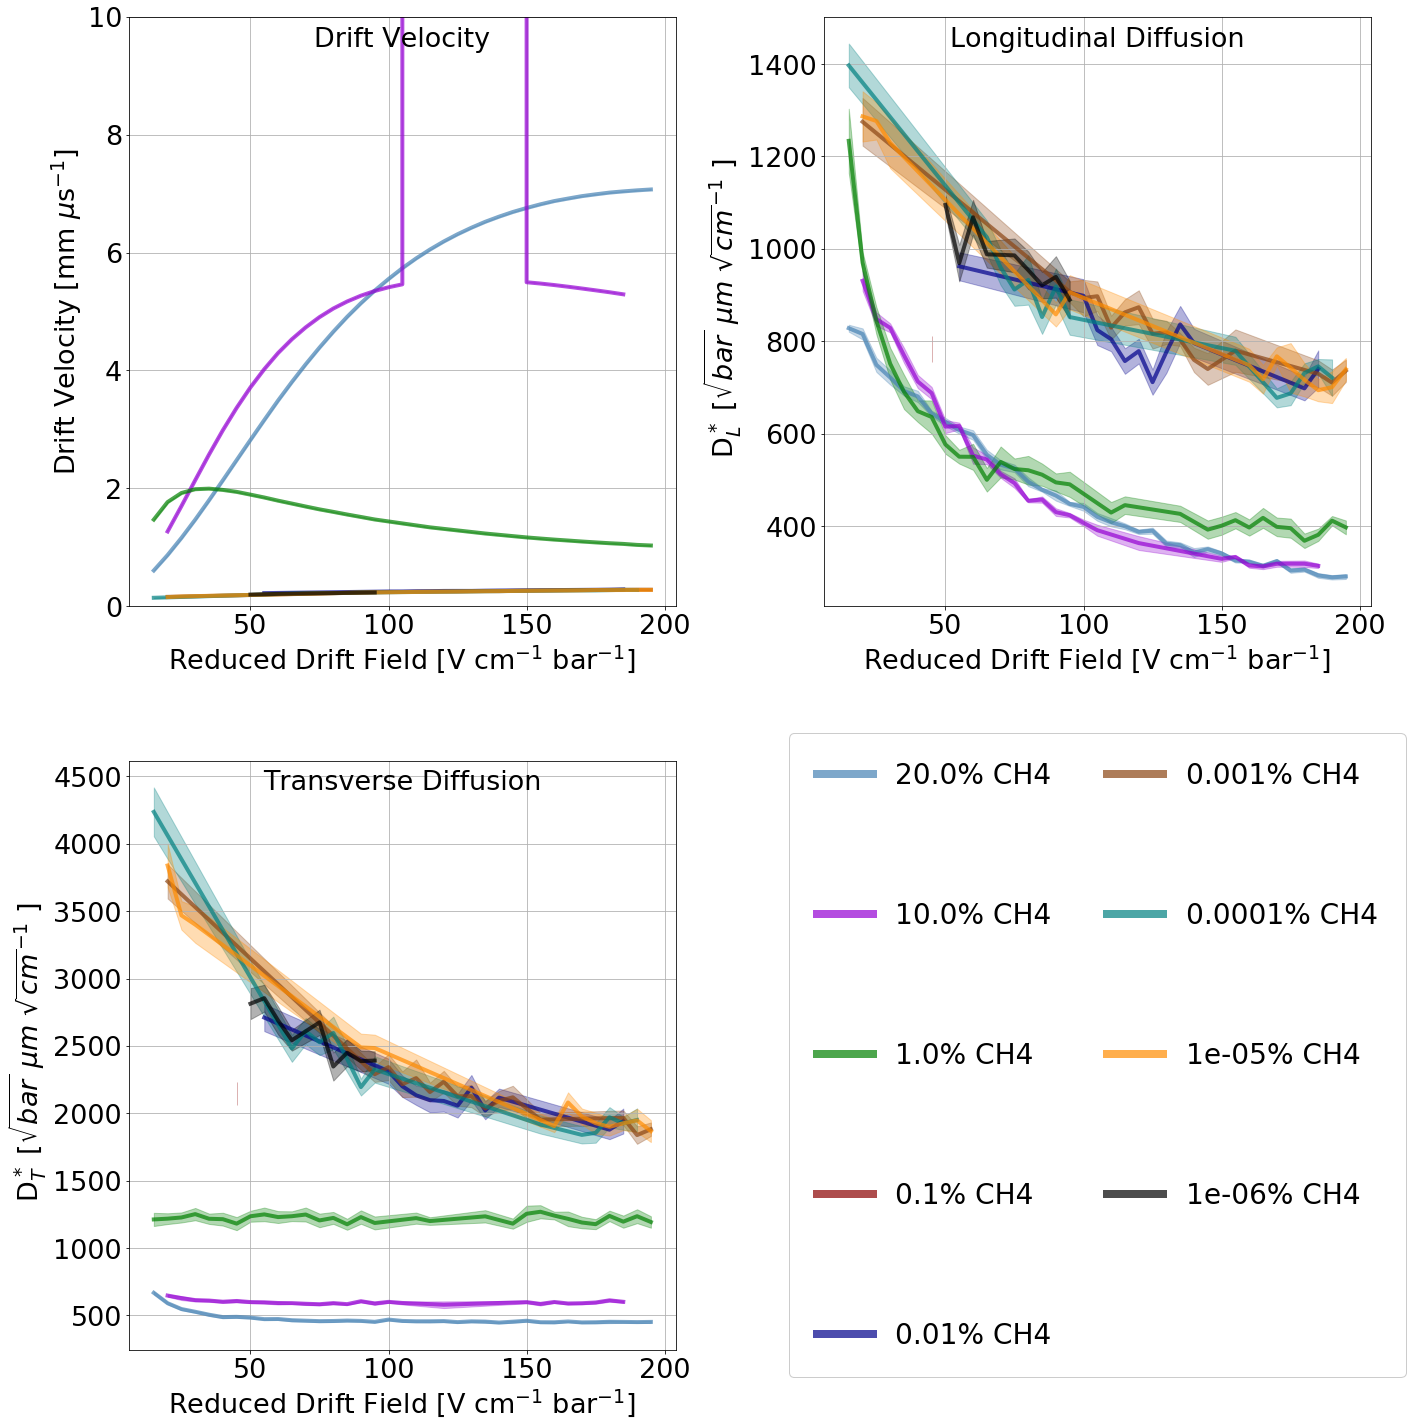

In [8]:
fig = plt.figure(figsize=(20,20))
#fig.suptitle('Argon dopped with CF4',fontsize=24)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
font_title = 27
font_ticks = 27
font_axis  = 27
title_pos  = (0.5, 0.94)
for x in range(0,len(Percent_AddMix)):
    Per = Percent_AddMix[x]
    lab = Per+"% CH4"
    col = Colors[x]
    
    ax1.set_title("Drift Velocity",fontsize=font_title,position=title_pos)
    redu = APA.root.CH4[Per].Reduced_Field.read()
    dz   = APA.root.CH4[Per].Drift_Velocity.read()*10000
    dze  = APA.root.CH4[Per].Drift_Velocity_Error.read()
    err  = dz*dze/100
    #err = dze
    ax1.plot(redu,dz,linewidth=4,alpha=0.7,color=col)
    ax1.fill_between(redu,dz+err,dz-err,alpha=0.3,color=col)
    ax1.tick_params(axis="x", labelsize=font_ticks)
    ax1.tick_params(axis="y", labelsize=font_ticks)
    ax1.set_xlabel(r'Reduced Drift Field [V cm$^{-1}$ bar$^{-1}$]',fontsize=font_axis)
    ax1.set_ylabel(r'Drift Velocity [mm $\mu$s$^{-1}$]',fontsize=font_axis)

    ax2.set_title("Longitudinal Diffusion",fontsize=font_title,position=title_pos)
    redu = APA.root.CH4[Per].Reduced_Field.read()
    dz   = APA.root.CH4[Per].Long.read()
    dze  = APA.root.CH4[Per].LongE.read()
    err  = dz*dze/100
    ax2.plot(redu,dz,linewidth=4,alpha=0.7,color=col)
    ax2.fill_between(redu,dz+err,dz-err,alpha=0.3,color=col)
    ax2.tick_params(axis="x", labelsize=font_ticks)
    ax2.tick_params(axis="y", labelsize=font_ticks)
    ax2.set_xlabel( r'Reduced Drift Field [V cm$^{-1}$ bar$^{-1}$]',fontsize=font_axis)
    ax2.set_ylabel(r" D$^*_L$ [$\sqrt{bar}$ $\mu m$ $\sqrt{cm}^{-1}$ ]",fontsize=font_axis)

    ax3.set_title("Transverse Diffusion",fontsize=font_title,position=title_pos)
    redu = APA.root.CH4[Per].Reduced_Field.read()
    dz   = APA.root.CH4[Per].Trans.read()
    dze  = APA.root.CH4[Per].TransE.read()
    err  = dz*dze/100
    ax3.plot(redu,dz,linewidth=4,alpha=0.7, label=lab,color=col)
    ax3.fill_between(redu,dz+err,dz-err,alpha=0.3,color=col)
    ax3.tick_params(axis="x", labelsize=font_ticks)
    ax3.tick_params(axis="y", labelsize=font_ticks)
    ax3.set_xlabel( r'Reduced Drift Field [V cm$^{-1}$ bar$^{-1}$]',fontsize=font_axis)
    ax3.set_ylabel(r" D$^*_T$ [$\sqrt{bar}$ $\mu m$ $\sqrt{cm}^{-1}$ ]",fontsize=font_axis)

    #ax3.legend(ncol=2, loc="upper left",fontsize=25)
    #ax3.legend(loc='center left',ncol=2, bbox_to_anchor=(1, 0.5),fontsize=25)
    ax4.plot(redu,dz,linewidth=8,alpha=0.7, label=lab,color=col)
    ax4.legend(loc='center',ncol=2, fontsize=28,facecolor='w',framealpha=1.0, 
               borderpad=1, labelspacing=4)
    #ax4.legend(frameon = 1).
    ax4.tick_params(axis="x", labelsize=0)
    ax4.tick_params(axis="y", labelsize=0)
    
ax1.set_ylim(0,10)
ax1.grid()
ax2.grid()
ax3.grid()
#plt.legend(bbox_to_anchor=(1.04,1),ncol=2, loc="upper left",fontsize=25)
plt.tight_layout()
#plt.savefig("Pyboltz_Argon_CH4.png")
plt.show()

In [ ]:
    legend = plt.legend(frameon = 1)
frame = legend.get_frame()
frame.set_color('white')

frame.set_facecolor('green')
frame.set_edgecolor('red')